## Algerian Forest Fires Dataset
Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into fire(138 classes) and not fire (106 classes) classes.

Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [96]:
dataset=pd.read_csv('../data/Algerian_forest_fires_dataset_UPDATE.csv' ,header=1)

In [97]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [98]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


### Data cleaning

In [99]:
dataset.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [100]:
dataset[dataset.isnull().any(axis = 1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


The dataset is converted into two sets based on Region from 122th index, we can make a new column based on the Region

1 : "Bejaia Region Dataset"

2 : "Sidi-Bel Abbes Region Dataset"

Add new column with region

In [101]:
dataset.loc[:122, "Region"] = 0
dataset.loc[122: , "Region"] = 1
df = dataset

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [103]:
df[['Region']] = df[['Region']].astype(int)

In [104]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [105]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [106]:
## remove the null values
df.dropna(inplace=True)
df.reset_index(drop = True, inplace=True)

In [107]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [108]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [109]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [110]:
# remove 122nd row
df=df.drop(122).reset_index(drop = True)

In [111]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [112]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [113]:
## fix spaces in column names
df.columns = df.columns.str.strip()

In [114]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


### Change the required columns as integer datatype

In [116]:
df[['month' , 'year' , 'day' , 'Temperature' , 'RH', 'Ws']] = df[['month' , 'year' , 'day' , 'Temperature' , 'RH', 'Ws']].astype(int)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


### Change the other columns to float data type

In [118]:
objects = [feature for feature in df.columns if df[feature].dtypes == 'O']

In [119]:
print(objects)

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']


In [120]:
for i in objects:
    if i != 'Classes':
        df[i] = df[i].astype(float)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [122]:
df.describe

<bound method NDFrame.describe of      day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  \
0      1      6  2012           29  57  18   0.0  65.7   3.4   7.6  1.3   3.4   
1      2      6  2012           29  61  13   1.3  64.4   4.1   7.6  1.0   3.9   
2      3      6  2012           26  82  22  13.1  47.1   2.5   7.1  0.3   2.7   
3      4      6  2012           25  89  13   2.5  28.6   1.3   6.9  0.0   1.7   
4      5      6  2012           27  77  16   0.0  64.8   3.0  14.2  1.2   3.9   
..   ...    ...   ...          ...  ..  ..   ...   ...   ...   ...  ...   ...   
238   26      9  2012           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9   
239   27      9  2012           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2   
240   28      9  2012           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4   
241   29      9  2012           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1   
242   30      9  2012           24  64  15   0.2  67.3   3.8  16.5  1.2   4

In [123]:
df.to_csv("../data/Algerian_Forest_Fires_cleaned_dataset.csv",index=False)

## EDA and Feature engineering

In [124]:
# drop day month and year
df_copy = df.drop(['day' , 'month' , 'year'], axis = 1)

In [125]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [126]:
#Encoding of categories in classes
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire') , 0 , 1)

In [127]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [128]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [129]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


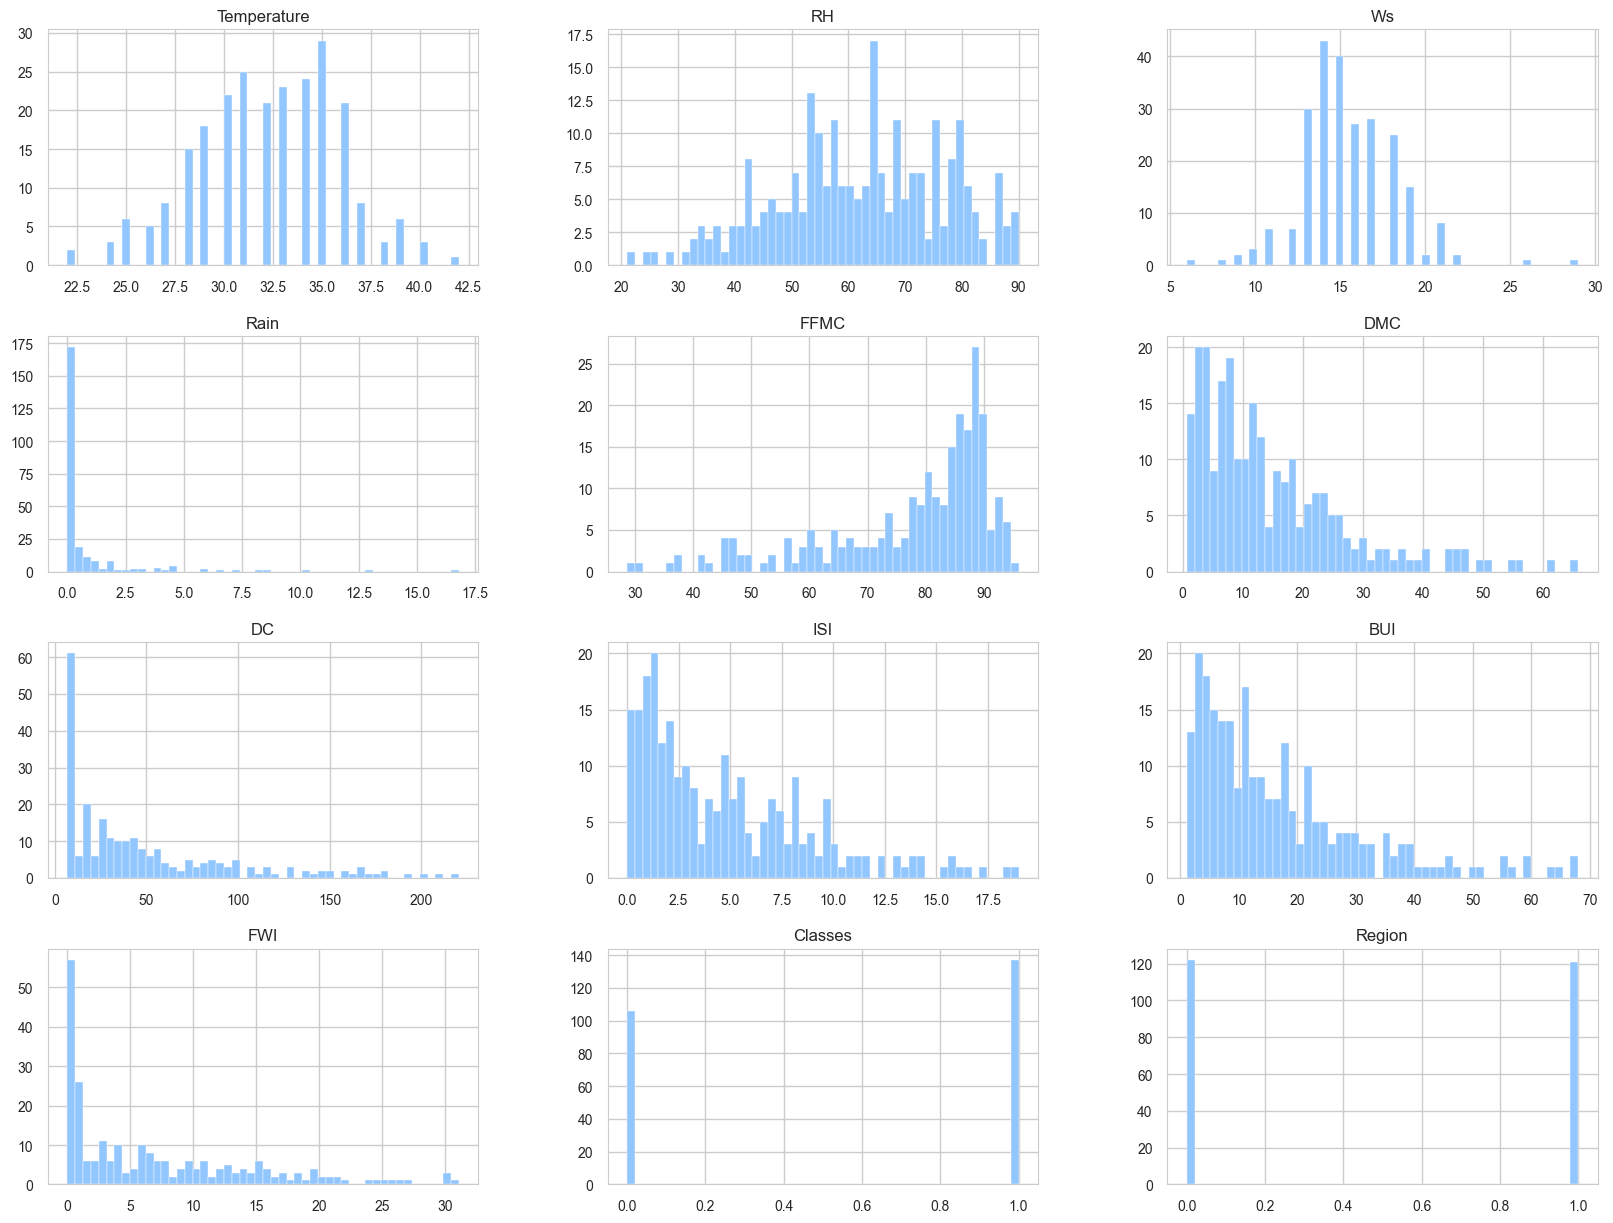

In [130]:
## plot density plot for all features
plt.style.use('seaborn-v0_8-notebook')
df_copy.hist(bins = 50, figsize=(20,15))
plt.show()

In [131]:
# Percentage of fires and not fires
percentage = df_copy['Classes'].value_counts(normalize=True)*100

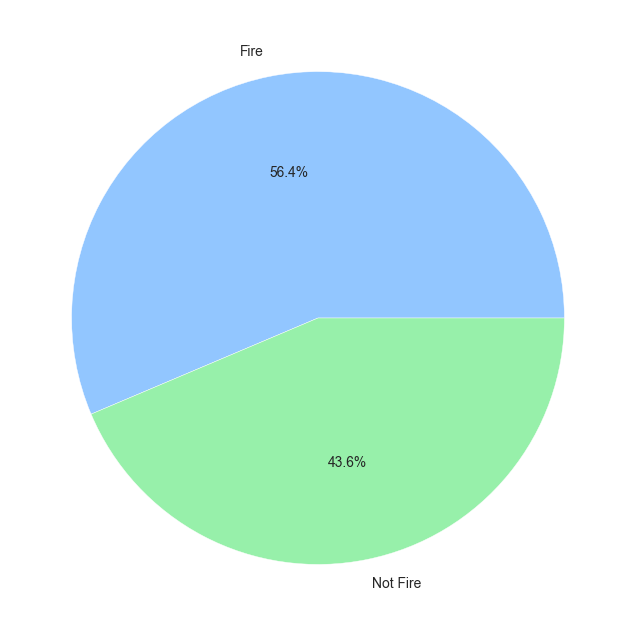

In [132]:
#plotting pie chart
classlabels = ['Fire' , 'Not Fire']
plt.figure(figsize=(10,8))
plt.pie(percentage, labels = classlabels, autopct='%1.1f%%')
plt.show()

### Check for correlation

In [133]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

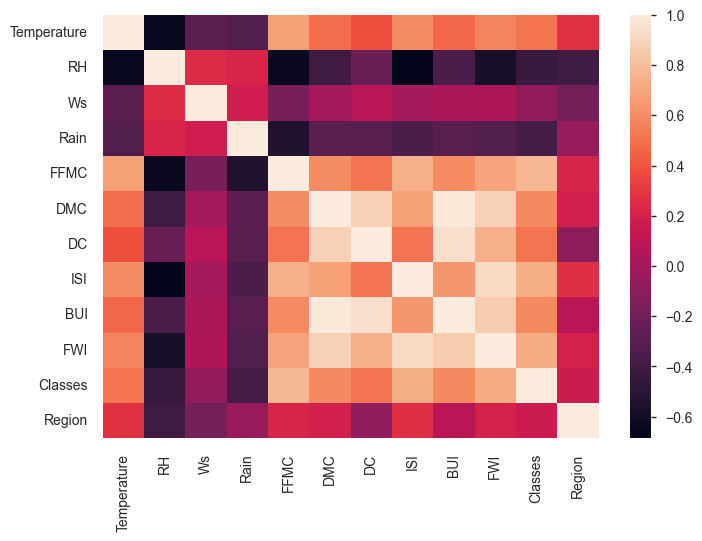

In [134]:
sns.heatmap(df_copy.corr())

<Axes: ylabel='FWI'>

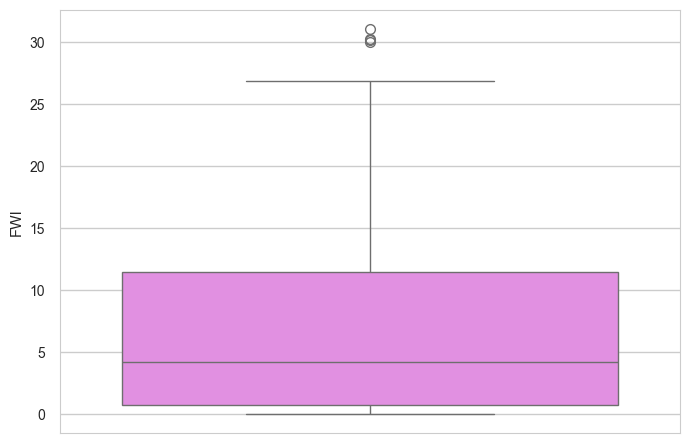

In [135]:
## Box plots
sns.boxplot(df_copy['FWI'], color= 'violet')

### Monthly Fire Analysis

In [136]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire') , 'not fire' , 'fire')

Text(0.5, 1.0, 'Monthly Fire Analysis of Sidibel Region')

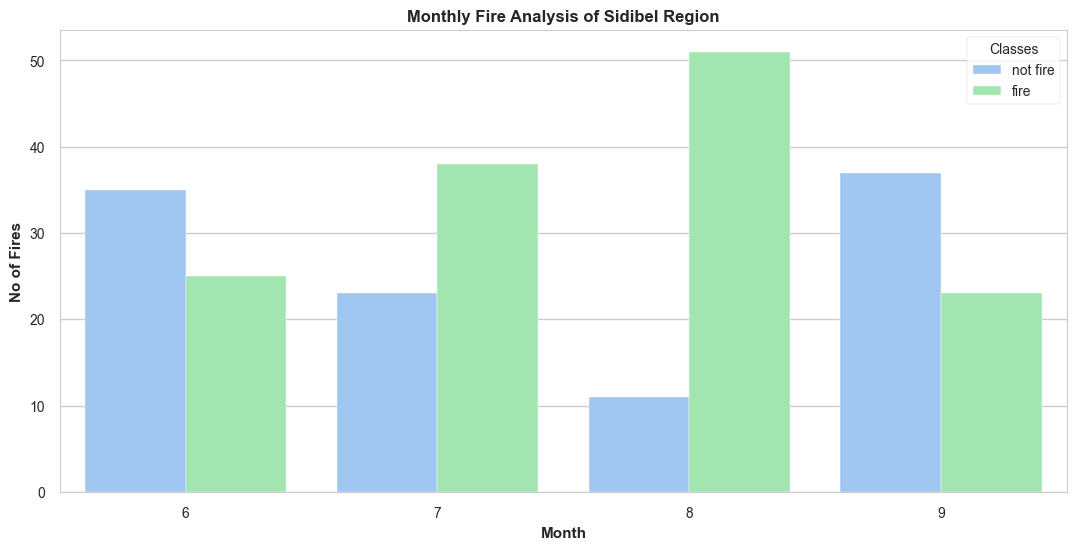

In [137]:
df_temp = df.loc[df['Region'] == 1]
plt.subplots(figsize = (13,6))
sns.set_style('whitegrid')
sns.countplot(x = 'month' , hue = 'Classes' , data= df)
plt.ylabel('No of Fires' , weight = 'bold')
plt.xlabel('Month' , weight = 'bold')
plt.title('Monthly Fire Analysis of Sidibel Region' , weight = 'bold')

Text(0.5, 1.0, 'Monthly Fire Analysis of Bejaia Region')

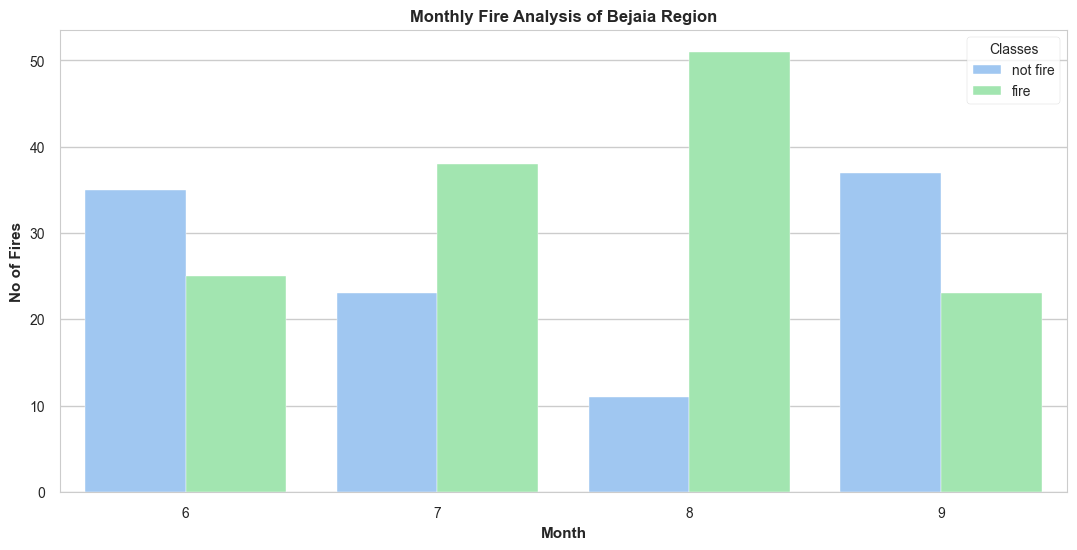

In [138]:
df_temp = df.loc[df['Region'] == 0]
plt.subplots(figsize = (13,6))
sns.set_style('whitegrid')
sns.countplot(x = 'month' , hue = 'Classes' , data= df)
plt.ylabel('No of Fires' , weight = 'bold')
plt.xlabel('Month' , weight = 'bold')
plt.title('Monthly Fire Analysis of Bejaia Region' , weight = 'bold')

It is observed that August had the most number of fires for both Sidibel and Bejaia regions.
And also, high number of fires occured in the months of in June, July and August.
September had the least number of fires for both the regions

## Feature Selection

In [139]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [140]:
#Split the dataset into dependent and independent features
X = df_copy.drop('FWI', axis = 1)
y = df['FWI']

In [141]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [142]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [143]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=81)

In [144]:
X_train.shape, X_test.shape

((182, 11), (61, 11))

### Feature selection based on correlation

In [159]:
sns.color_palette("dark")

[(0.0, 0.10980392156862745, 0.4980392156862745),
 (0.6941176470588235, 0.25098039215686274, 0.050980392156862744),
 (0.07058823529411765, 0.44313725490196076, 0.10980392156862745),
 (0.5490196078431373, 0.03137254901960784, 0.0),
 (0.34901960784313724, 0.11764705882352941, 0.44313725490196076),
 (0.34901960784313724, 0.1843137254901961, 0.050980392156862744),
 (0.6352941176470588, 0.20784313725490197, 0.5098039215686274),
 (0.23529411764705882, 0.23529411764705882, 0.23529411764705882),
 (0.7215686274509804, 0.5215686274509804, 0.0392156862745098),
 (0.0, 0.38823529411764707, 0.4549019607843137)]

<Axes: >

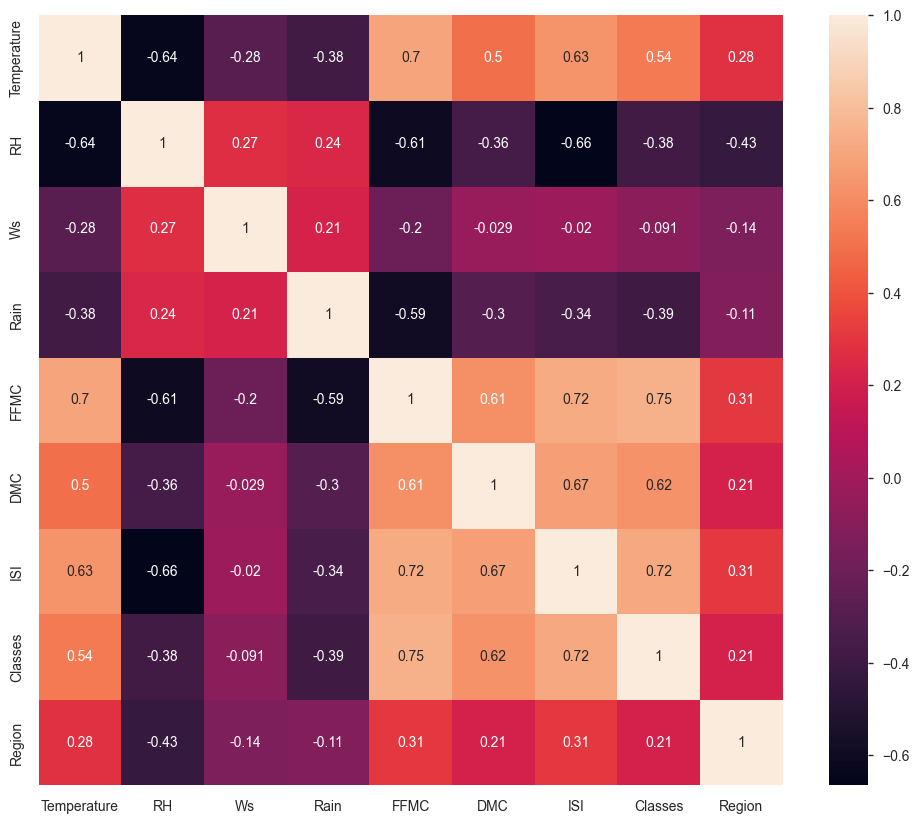

In [161]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr, annot=True)

In [146]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [147]:
# threshold = 0.9 (domain expertise)
corr_features = correlation(X_train, 0.85)

In [148]:
## drop the above features when correlation is more than 0.85
X_train.drop(corr_features, axis = 1, inplace= True)
X_test.drop(corr_features, axis = 1, inplace= True)
X_train.shape, X_test.shape

((182, 9), (61, 9))

### Standardization

In [149]:
from sklearn.preprocessing import StandardScaler

In [150]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [151]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
146,34,70,16,0.0,86.0,12.8,5.4,1,1
44,30,80,19,0.4,60.7,5.2,1.1,0,0
121,25,78,14,1.4,45.0,1.9,0.2,0,0
167,32,81,17,0.0,84.6,21.1,4.7,1,1
183,40,34,14,0.0,93.3,10.8,13.8,1,1
...,...,...,...,...,...,...,...,...,...
75,36,55,13,0.3,82.4,15.6,3.7,1,0
174,33,63,17,1.1,72.8,20.9,1.6,0,1
56,36,48,13,0.0,90.3,22.2,8.7,1,0
193,39,21,17,0.4,93.0,18.4,15.5,1,1


Text(0.5, 1.0, 'X_train after scaling')

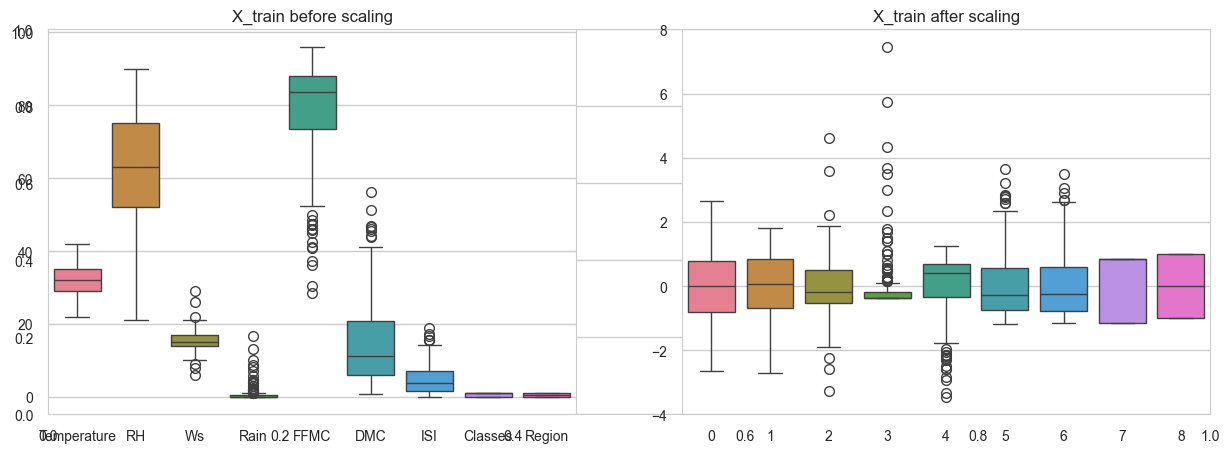

In [152]:
## Box plots to understand the effects of standard scaler
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data = X_train)
plt.title('X_train before scaling')
plt.subplot(1,2,2)
sns.boxplot(data = X_train_scaled)
plt.title('X_train after scaling')

## Linear Regression Model

In [162]:
from sklearn.linear_model import LinearRegression

In [163]:
regression = LinearRegression()
regression.fit(X_train_scaled,y_train)

LinearRegression()

In [165]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [166]:
y_pred = regression.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test , y_pred)
print(mae, r2)

0.8213498059960959 0.9827768976887153


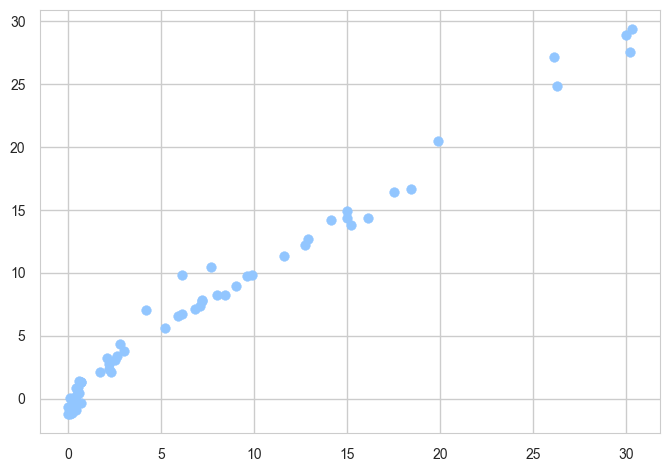

In [167]:
plt.scatter(y_test, y_pred)

## LASSO Regression

In [ ]:
from sklearn.linear_model import Lasso 

In [ ]:
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mae, r2)

1.406299923323665 0.9458190871304557


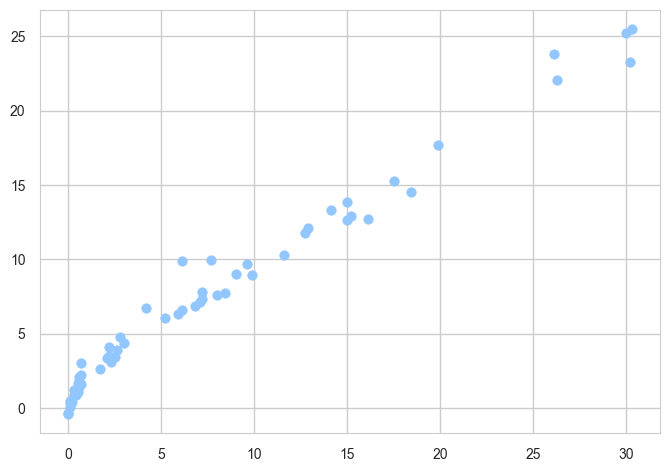

In [170]:
plt.scatter(y_test, y_pred)

## Ridge

In [171]:
from sklearn.linear_model import Ridge

0.8428891897374841 0.9820868463513212


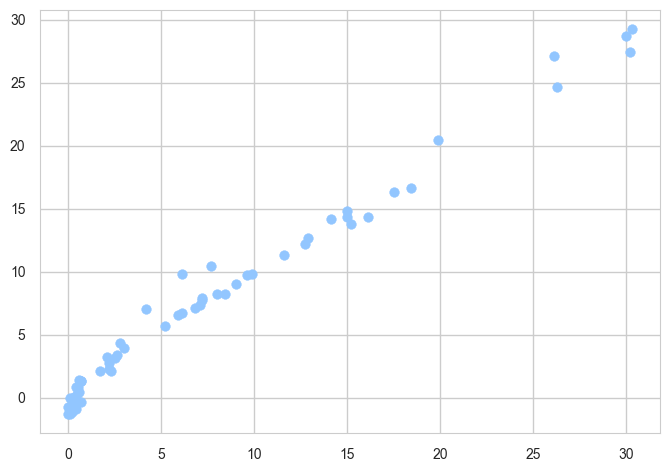

In [172]:
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mae, r2)
plt.scatter(y_test, y_pred)

## ElasticNet Regression

2.0879215901659944 0.8755299648430285


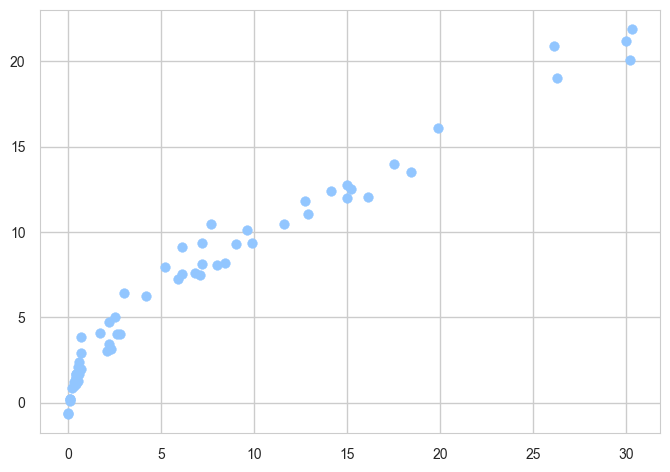

In [173]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic.fit(X_train_scaled, y_train)
y_pred = elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mae, r2)
plt.scatter(y_test, y_pred)

## Cross Validation with LASSO

In [174]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(n_jobs=-1, cv = 5)
lassocv.fit(X_train_scaled , y_train)
y_pred = lassocv.predict(X_test_scaled)

In [175]:
lassocv.alpha_

np.float64(0.02272181258108056)

In [176]:
lassocv.alphas_

array([6.47125372, 6.03511288, 5.62836647, 5.24903341, 4.89526612,
       4.56534157, 4.25765283, 3.97070128, 3.7030893 , 3.45351348,
       3.22075823, 3.0036899 , 2.80125126, 2.6124563 , 2.43638549,
       2.27218126, 2.11904385, 1.97622738, 1.84303627, 1.7188218 ,
       1.60297896, 1.49494354, 1.39418935, 1.30022565, 1.2125948 ,
       1.13086997, 1.05465312, 0.98357303, 0.9172835 , 0.85546166,
       0.79780641, 0.74403692, 0.69389133, 0.64712537, 0.60351129,
       0.56283665, 0.52490334, 0.48952661, 0.45653416, 0.42576528,
       0.39707013, 0.37030893, 0.34535135, 0.32207582, 0.30036899,
       0.28012513, 0.26124563, 0.24363855, 0.22721813, 0.21190438,
       0.19762274, 0.18430363, 0.17188218, 0.1602979 , 0.14949435,
       0.13941894, 0.13002257, 0.12125948, 0.113087  , 0.10546531,
       0.0983573 , 0.09172835, 0.08554617, 0.07978064, 0.07440369,
       0.06938913, 0.06471254, 0.06035113, 0.05628366, 0.05249033,
       0.04895266, 0.04565342, 0.04257653, 0.03970701, 0.03703

In [177]:
lassocv.mse_path_

array([[34.31506876, 31.8134043 , 40.08080789, 62.84464216, 74.62319223],
       [29.69855438, 27.71810563, 36.57253874, 60.88218941, 74.62319223],
       [25.73765186, 24.0791662 , 33.46676504, 54.82704155, 73.44982519],
       [22.3518956 , 20.92337121, 30.71473176, 49.49383881, 65.46740642],
       [19.46240703, 18.18727579, 27.5944109 , 44.33517231, 58.50138234],
       [17.0007727 , 15.81558313, 24.45242574, 39.10924718, 51.2626793 ],
       [14.90785552, 13.76021521, 21.70516644, 34.53565676, 44.93188379],
       [13.13230122, 11.97961429, 19.30194146, 30.53118501, 39.41477223],
       [11.62986551, 10.43744654, 17.19886985, 27.02349611, 34.60588166],
       [10.36210472,  9.10221714, 15.35772366, 23.94955527, 30.41366567],
       [ 9.29582494,  7.9465631 , 13.74519573, 21.25411708, 26.75815602],
       [ 8.40233295,  6.94671308, 12.33226266, 18.88994904, 23.57065317],
       [ 7.65674565,  6.08195421, 11.09331541, 16.81495357, 20.79046746],
       [ 7.03784335,  5.33448788, 10.0

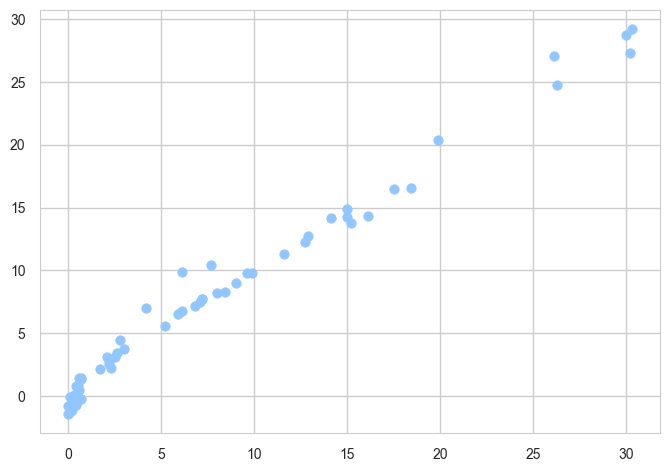

In [178]:
plt.scatter(y_test, y_pred)

In [181]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mae, r2)

0.8334707927054413 0.9822645872481442


## RidgeCV

In [182]:
from sklearn.linear_model import RidgeCV

0.8428891897374841 0.9820868463513212


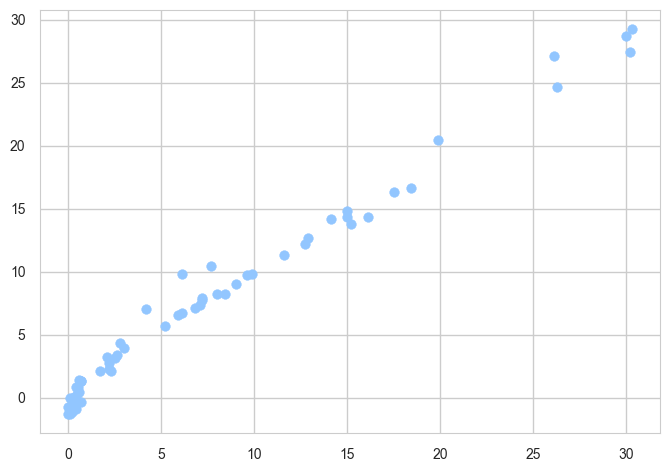

In [184]:
ridgecv = RidgeCV(cv = 5)
ridgecv.fit(X_train_scaled , y_train)
y_pred = ridgecv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mae, r2)
plt.scatter(y_test, y_pred)

In [185]:
ridgecv.alpha_

np.float64(1.0)

In [187]:
ridgecv.alphas

(0.1, 1.0, 10.0)

In [188]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

## ElasticNetCV

In [189]:
from sklearn.linear_model import ElasticNetCV

0.8691114515350208 0.9811644926795923


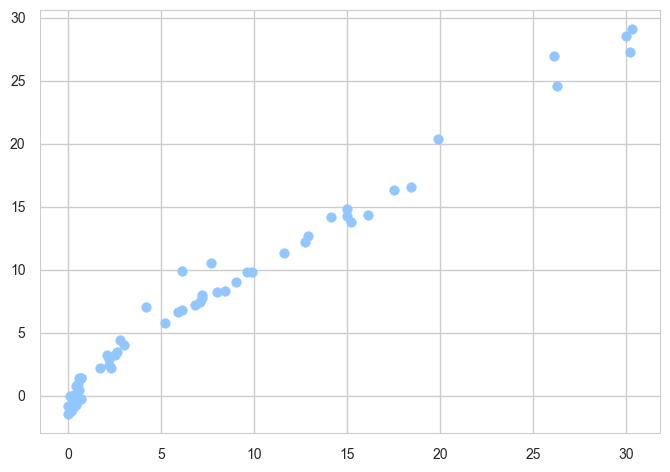

In [190]:
elasticnetcv = ElasticNetCV(cv = 5)
elasticnetcv.fit(X_train_scaled , y_train)
y_pred = elasticnetcv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mae, r2)
plt.scatter(y_test, y_pred)

In [192]:
elasticnetcv.alphas_

array([12.94250745, 12.07022576, 11.25673294, 10.49806682,  9.79053225,
        9.13068314,  8.51530566,  7.94140256,  7.4061786 ,  6.90702695,
        6.44151645,  6.0073798 ,  5.60250251,  5.22491259,  4.87277097,
        4.54436252,  4.23808769,  3.95245477,  3.68607254,  3.43764359,
        3.20595792,  2.98988708,  2.7883787 ,  2.60045131,  2.42518959,
        2.26173993,  2.10930623,  1.96714605,  1.83456699,  1.71092332,
        1.59561281,  1.48807385,  1.38778265,  1.29425074,  1.20702258,
        1.12567329,  1.04980668,  0.97905322,  0.91306831,  0.85153057,
        0.79414026,  0.74061786,  0.6907027 ,  0.64415165,  0.60073798,
        0.56025025,  0.52249126,  0.4872771 ,  0.45443625,  0.42380877,
        0.39524548,  0.36860725,  0.34376436,  0.32059579,  0.29898871,
        0.27883787,  0.26004513,  0.24251896,  0.22617399,  0.21093062,
        0.19671461,  0.1834567 ,  0.17109233,  0.15956128,  0.14880738,
        0.13877827,  0.12942507,  0.12070226,  0.11256733,  0.10

In [193]:
elasticnetcv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}